# Data Preprocessing

## Goal

Goal of Data Preprocessing in building Machine Learning:
1. Understand and prepare the datasets for ML modeling process
2. Transform raw data into understandable, useful, and efficient format.

## Data Handling

Problems:
- Missing or incomplete
    - Attributes/values are missing
    - Only aggregated data is available
- Noisy: errors, outliers, inconsistency
- Categorical or continuous: data are not standardized


Solutions:
- Replace with default value
- Replace with mean/median/mode
- Drop data

## Data Transformation

- Transform data to be learned easier by computer
- Simplify data by decreasing its scale
- Convert data type to categorical or numerical

### Categorical

Two methods to transform categorical features into numerical value:

1. Label encoder for ordinal data. Example:
    - Low = 1
    - Medium = 2
    - High = 3


2. One hot encoder for nominal data. Example:
    - Male = [1, 0]
    - Female = [0, 1]

### Numerical

Two methods to transform numerical feature for having same scale:

1. Standard scaler: into standard normal distribution (mean = 0, sd = 1)
2. Min-max scaler: into range 0 to 1

## Feature Analysis

1. Feature selection:
    - Based on domain knowledge
    - Exclude unnecessary features
    - Visualization: heatmap, etc


2. Feature engineering:
    - Based on domain knowledge
    - Generate new feature based on other related dataset


3. Dimensionality reduction:
    - Keep all information from all feature before extract the information
    - Techniques: Principal Component Analysis, Linear Discriminant Analysis, Auto Encoder (using Neural Network)

# Load Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

# Employee Dataset

## Load Data

In [2]:
employee = pd.read_csv("datasets/employee.csv")
employee.head()

,no,nama,tanggal_lahir,jenis_kelamin,gaji
0,1,ani,3/2/1993,perempuan,1000000
1,2,budi,3/1/1992,laki-laki,2000000
2,3,susi,4/5/2000,perempuan,1350000
3,4,wati,5/20/1995,perempuan,10000000
4,5,ati,4/23/1994,perempuan,3400000


## Inspect Data

In [3]:
employee.shape

(10, 5)

Cek tipe data, yang harus disesuaikan adalah: `tanggal_lahir` dan `jenis_kelamin`.

In [4]:
employee.dtypes

no                int64
nama             object
tanggal_lahir    object
jenis_kelamin    object
gaji              int64
dtype: object

Cek missing value:

In [5]:
employee.isnull().any()

no               False
nama             False
tanggal_lahir    False
jenis_kelamin    False
gaji             False
dtype: bool

## Preprocess Data

### Handling Datetime

In [6]:
employee['tanggal_lahir'] = pd.to_datetime(employee['tanggal_lahir'])
employee.dtypes

no                        int64
nama                     object
tanggal_lahir    datetime64[ns]
jenis_kelamin            object
gaji                      int64
dtype: object

### Handling Categorical Feature (One-Hot Encoder)

In [7]:
jk_dummies = pd.get_dummies(employee['jenis_kelamin'], prefix='jk')
jk_dummies.head()

,jk_laki-laki,jk_perempuan
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


Gabungkan hasil one-hot encoder dengan dataframe utama:

In [8]:
employee_jk = pd.concat([employee, jk_dummies], axis=1)
employee_jk

,no,nama,tanggal_lahir,jenis_kelamin,gaji,jk_laki-laki,jk_perempuan
0,1,ani,1993-03-02,perempuan,1000000,0,1
1,2,budi,1992-03-01,laki-laki,2000000,1,0
2,3,susi,2000-04-05,perempuan,1350000,0,1
3,4,wati,1995-05-20,perempuan,10000000,0,1
4,5,ati,1994-04-23,perempuan,3400000,0,1
5,6,ina,1991-05-06,perempuan,5000000,0,1
6,7,nia,1990-04-05,perempuan,2500000,0,1
7,8,dodi,1998-04-03,laki-laki,3400000,1,0
8,9,dedi,1993-06-20,laki-laki,8900000,1,0
9,10,roni,2001-09-20,laki-laki,2100000,1,0


Hapus kolom `jenis_kelamin` karena sudah di-encode:

In [9]:
employee_jk = employee_jk.drop('jenis_kelamin', axis=1)
employee_jk.head()

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan
0,1,ani,1993-03-02,1000000,0,1
1,2,budi,1992-03-01,2000000,1,0
2,3,susi,2000-04-05,1350000,0,1
3,4,wati,1995-05-20,10000000,0,1
4,5,ati,1994-04-23,3400000,0,1


### Handling Categorical Feature (Label Encoder)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()
employee_jk['jk_label'] = encoder.fit_transform(employee['jenis_kelamin'])
employee_jk.head()

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan,jk_label
0,1,ani,1993-03-02,1000000,0,1,1
1,2,budi,1992-03-01,2000000,1,0,0
2,3,susi,2000-04-05,1350000,0,1,1
3,4,wati,1995-05-20,10000000,0,1,1
4,5,ati,1994-04-23,3400000,0,1,1


### Handling Numerical Feature (Standard Scaler)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
employee_jk['gaji_standard_scale'] = scaler.fit_transform(employee[['gaji']])
employee_jk.head()

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan,jk_label,gaji_standard_scale
0,1,ani,1993-03-02,1000000,0,1,1,-1.001779
1,2,budi,1992-03-01,2000000,1,0,0,-0.663911
2,3,susi,2000-04-05,1350000,0,1,1,-0.883525
3,4,wati,1995-05-20,10000000,0,1,1,2.039035
4,5,ati,1994-04-23,3400000,0,1,1,-0.190896


Cek skalanya:

In [14]:
employee_jk['gaji_standard_scale'].describe()

count    10.000000
mean      0.000000
std       1.054093
min      -1.001779
25%      -0.655464
50%      -0.342936
75%       0.214546
max       2.039035
Name: gaji_standard_scale, dtype: float64

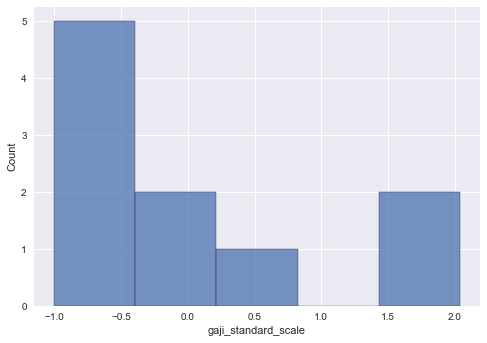

In [15]:
sns.histplot(employee_jk['gaji_standard_scale'])
plt.show()

### Handling Numerical Feature (Min Max Scaler)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
employee_jk['gaji_minmax_scale'] = scaler.fit_transform(employee[['gaji']])
employee_jk.head()

,no,nama,tanggal_lahir,gaji,jk_laki-laki,jk_perempuan,jk_label,gaji_standard_scale,gaji_minmax_scale
0,1,ani,1993-03-02,1000000,0,1,1,-1.001779,0.000000
1,2,budi,1992-03-01,2000000,1,0,0,-0.663911,0.111111
2,3,susi,2000-04-05,1350000,0,1,1,-0.883525,0.038889
3,4,wati,1995-05-20,10000000,0,1,1,2.039035,1.000000
4,5,ati,1994-04-23,3400000,0,1,1,-0.190896,0.266667


Cek skalanya:

In [18]:
employee_jk['gaji_minmax_scale'].describe()

count    10.000000
mean      0.329444
std       0.346648
min       0.000000
25%       0.113889
50%       0.216667
75%       0.400000
max       1.000000
Name: gaji_minmax_scale, dtype: float64

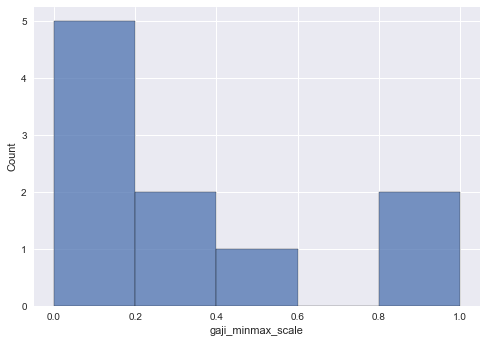

In [19]:
sns.histplot(employee_jk['gaji_minmax_scale'])
plt.show()